# Analyzing Twitch Channel Statistics With The Data Science Pipeline
By: Joseph Chan

## Background
Twitch is currently one of the most popular gaming and variety streaming servives home to millions of streamers and millions more viewers. Popular streamers have active communities that will consistently tune in and chat with the streamer or each other. Often it is a streamer's community and its growth that defines a streamer's career.

## Introduction
In this tutorial, we will use data engineering from the data science pipeline to explore and analyize community metrics from the top streamers on Twitch. The "data science pipeline" is not well-defined but, data engineering is an undisbuted basis of the pipeline.

The steps of data engineering we will cover are data collection and exploratory data analysis.

## Libraries
- Pandas: To display and manage our data
- Numpy: To perform operations on our data
- Seaborn: To create plots
- Matplotlib: To format and display plots

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection
The dataset we will be using is on Kaggle here: https://www.kaggle.com/aayushmishra1512/twitchdata

After downloading and extracting, you will have a csv (comma-separated values) file titled: twitchdata-update.csv

Copy the csv file into the working directory of your Jupyter Notebook or include the path to it in .read_csv(). Then, using Pandas we can read in the csv file and store it in a Pandas dataframe

In [4]:
# Pandas read_csv('<.csv file>') imports and converts the file to a dataframe and stores it in 'data'
data = pd.read_csv('twitchdata-update.csv')

# .head() shows the first few rows of the dataframe
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


# Exploratory Analysis
## About the Data
The dataset consists of the top 1000 streamers from one year and their respective community stats which include:
- Channel (Channel Name)
- Watch Time (Minutes)
- Stream Time (Minutes)
- Peak Viewers
- Average Viewers
- Followers
- Followers Gained
- Views Gained
- Partnered (Whether the streamer is a Twitch partner)
- Mature (Whether the streamer streams 18+ content)
- Language (Primary language spoken on the channel)

## Poking Around the Data
We can start by creating a correlation [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html). This heatmap can give an indication of what features are related.

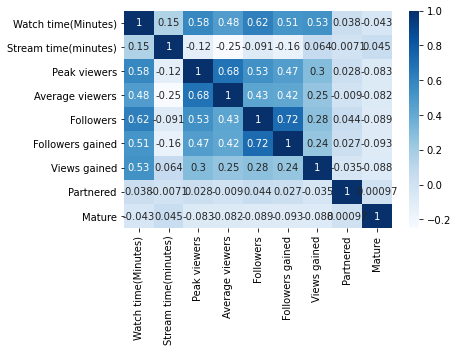

In [5]:
# We calculate correlations here
corr = data.corr()

# Seaborn plots our correlations
# annot show each block's values and cmap is the color theme
sns.heatmap(corr, annot = True, cmap='Blues')

# Matplotlib displays our plot
plt.show()

## First Glance Analysis
Based on the heatmap, the strongest correlation is followers and followers gained at 0.74. However, correlation does not necessary imply relationship  we must employ our intuition. In this case, the most apparent reasoning could be that people are attracted to already popular channels. We will apply this intuition to the rest of the correlations.

Some other prominent relationships are:
- Average Viewers and Peak Viewers: 0.68
- Followers and Watch Time: 0.62
- Peak Viewers and Watch Time: 0.58
- Followers and Peak Viewers: 0.53
- Views Gained and Watch Time: 0.53
- Followers Gained and Watch Time: 0.51

Interestingly some features have many strong correlations with other features. This suggests they are more critical features which may affect many other features:
- Watch Time
- Peak Viewers
- Average Viewers
- Followers
- Followers Gained


## Exploring the Relationships
We will plot them against each other to pull some potentially useful visual insights.

First we will plot the most strongly correlated relationship: followers against followers. We are using Seaborn's [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) over thier [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) because regplot automatically calculates a linear trendline for us and we are most interested in that line. While we can use lineplot, it will attempt to draw a curved line between each data point which is not useful and more work to then add a linear regression line.

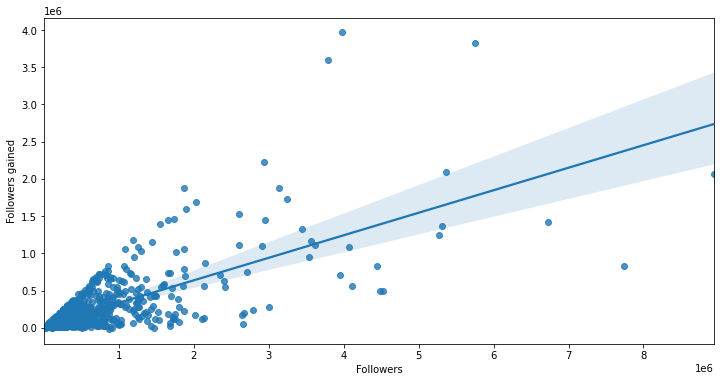

In [6]:
# plt.figure creates a canvas on which to place our seaborn plot
plt.figure(figsize=(12,6))

# we use seaborn's regplot which shows a linear regression line to visualize the trend
sns.regplot(x=data['Followers'], y=data['Followers gained'])

# plot.show() displays the plt.figure
plt.show()

The trendline shows an increasing trend between more followers and increased followers gained. This implies that those with more followers will increase said follower count at greater rates.

After confirming the previous relationship and we naturally turn our attention to the other strongly correlated relationships we found eariler the value of exploring these realtionships comes into question. When we plot one of these relationships such as watch time against followers be have the following plot:

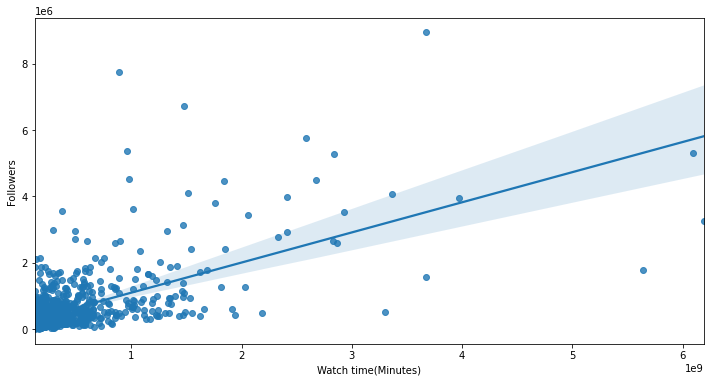

In [7]:
# plt.figure creates a canvas on which to place our seaborn plot
plt.figure(figsize=(12,6))

# we use seaborn's regplot which shows a linear regression line to visualize the trend
sns.regplot(x=data['Watch time(Minutes)'], y=data['Followers'])

# plot.show() displays the plt.figure
plt.show()

## Surface-Level Relationships
While the above plot does display a potential relationship, when we should apply our intuition. A channel with many people following should generally result in more total channel watch time. We should check this almost obvious correlation that it matches our expectation however, it does not provide significant insights. 

## Exploring Categorical Features
The correlation heatmap is incredibly useful however non-continuous features such as our binary (True or False) "mature" are not well represented. Here we will explore other visualizations to compare these categorical features to interesting featuers we found earlier. 

We will compare our categorical features against watch time and followers. Dispite their direct comparision did not yielding interesting insights, they have a particularly strong correlation we could leverage. Now, we can expect the next few visualizations to look similar with deviations worth looking into.

To compare categorical features against continuous numerical values we will use [boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html).
## Partnered

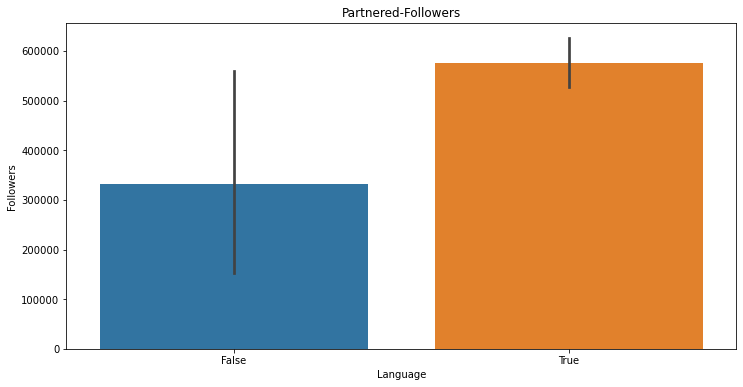

In [8]:
# figsize allows us to change the size and shape of the canvas on which we place our plot
# we use 12,6 (width, height) on our two column barplots because we are primarily looking at the y-axis on few x-axis points
plt.figure(figsize=(12,6))
# Seaborn provides barplots for us
sns.barplot(x=data['Partnered'], y=data['Followers'])
# Matplotlib gives us the option to title and label our figures 
plt.xlabel('Language')
plt.ylabel('Followers')
plt.title('Partnered-Followers')
plt.show()

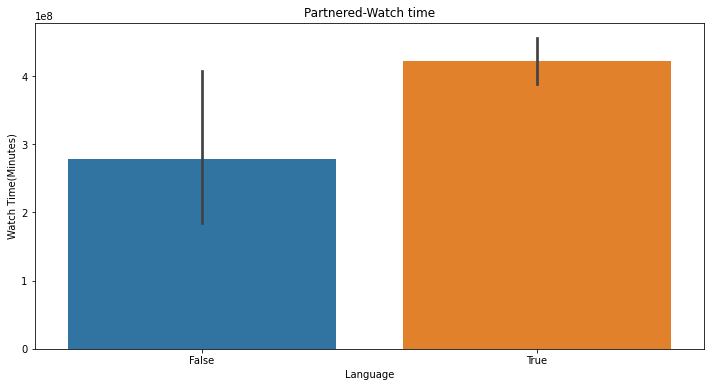

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['Partnered'], y=data['Watch time(Minutes)'])
plt.xlabel('Language')
plt.ylabel('Watch Time(Minutes)')
plt.title('Partnered-Watch time')
plt.show()

From the plots above, there is little relative difference between followers and watch time in relation to partnership. In addition, if a streamer is partnered with Twitch in general they have more watch time and followers. But one must also consider the inverse correlation that high watch time and follower counts result in a streamer becoming a Twitch partner.

## Mature Content

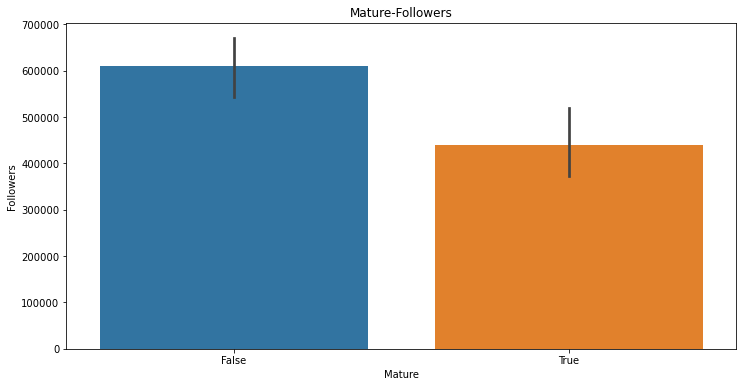

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['Mature'], y=data['Followers'])
plt.xlabel('Mature')
plt.ylabel('Followers')
plt.title('Mature-Followers')
plt.show()

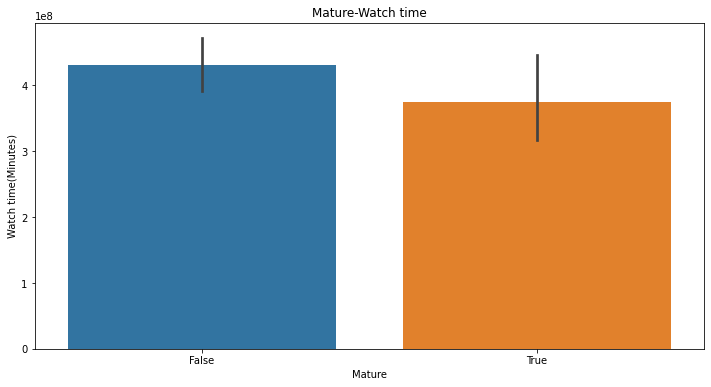

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['Mature'], y=data['Watch time(Minutes)'])
plt.xlabel('Mature')
plt.ylabel('Watch time(Minutes)')
plt.title('Mature-Watch time')
plt.show()

Again, we see little visual difference between followers and watch time. In this case however, a streamer tends to have more followers and watch time if they do **not** stream mature content.

## Language

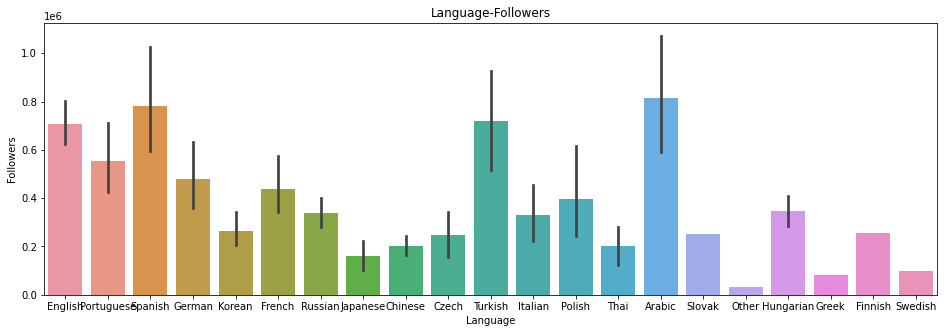

In [12]:
plt.figure(figsize=(16,5))
sns.barplot(x=data['Language'], y=data['Followers'])
plt.xlabel('Language')
plt.ylabel('Followers')
plt.title('Language-Followers')
plt.show()

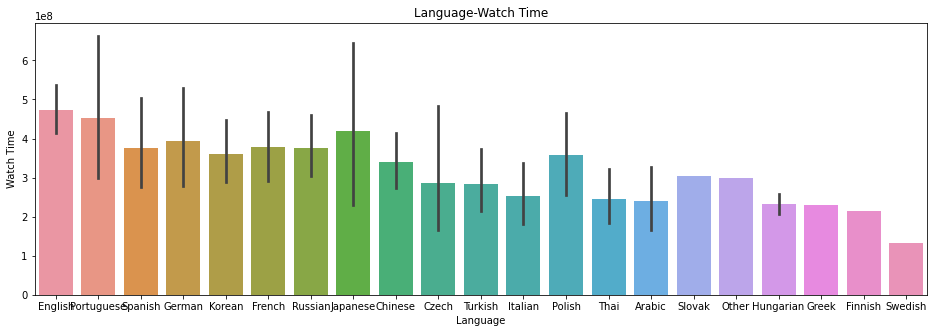

In [13]:
plt.figure(figsize=(16,5))
sns.barplot(x=data['Language'], y=data['Watch time(Minutes)'])
plt.xlabel('Language')
plt.ylabel('Watch Time')
plt.title('Language-Watch Time')
plt.show()

Here, we find significant differences between followers and watch time. For instance, Japanese streams account for a very small proportion of followers yet have one of the highest amounts of watch time. Perhaps a stream's primary language may significantly affect the watch time per follower. To investigate this, we will plot language against watch time/follower to find watch time per follower.

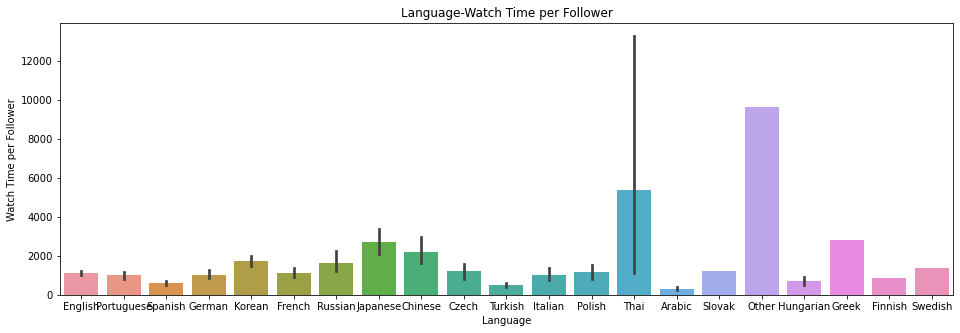

In [14]:
plt.figure(figsize=(16,5))
sns.barplot(x=data['Language'], y=data['Watch time(Minutes)']/data['Followers'])
plt.xlabel('Language')
plt.ylabel('Watch Time per Follower')
plt.title('Language-Watch Time per Follower')
plt.show()

## Results of our Exploration
From poking around the data and visualizing the data via plots, we have explored strong correlations between our data features. Some may bring unique insights however, we do not have to stop there.

We can try to break expected correlations by comparing against a feature without strong correlations. In this tutorial, we found that comparing watch time and followers against a third factor (primary channel language) produces interesting insights. For instance, it seems that Thai Twitch viewers have paricularly more watch time per follower. Hence we can suggest a streamer looking to grow their community to become more accesible to the Thai Twitch community.